In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import scipy.stats as s
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer

In [176]:
df=pd.read_csv("titanic.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [177]:
x_train,x_test,y_train,y_test=train_test_split(df[["Age","Fare"]],df["Survived"],test_size=0.2,random_state=42)

In [178]:
imputer=SimpleImputer(strategy="mean")
x_train=pd.DataFrame(imputer.fit_transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(imputer.transform(x_test),columns=x_test.columns)

## 1. Log Tranformation

In [179]:
#we do it when data is right skewed to make it normal. useful for linear models

In [180]:
#first lets check data normality

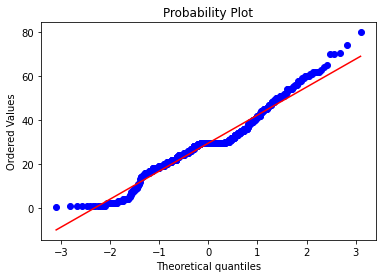

In [181]:
s.probplot(x_train["Age"],plot=plt)
plt.show()

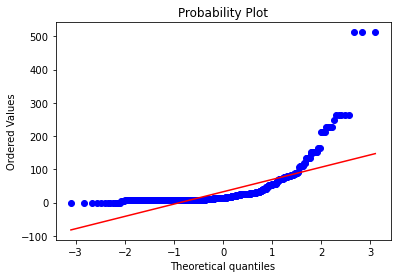

In [182]:
s.probplot(x_train["Fare"],plot=plt)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

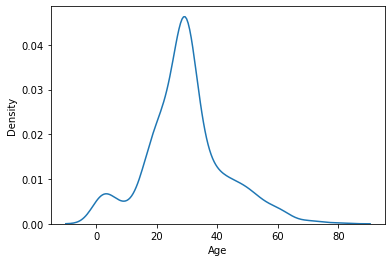

In [183]:
#sns.histplot(data=x_train,x="Age")
sns.kdeplot(data=x_train,x="Age")

<AxesSubplot:xlabel='Fare', ylabel='Density'>

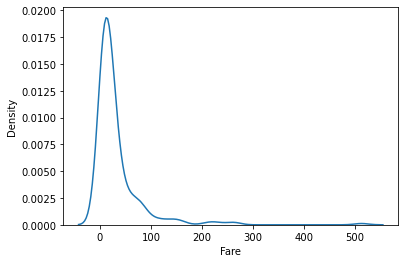

In [184]:
sns.kdeplot(data=x_train,x="Fare")

In [185]:
#age is not normal but it is atleast close. but fare is completely right skewed

- Modelling without any transformation using linear model-logistic and tree based-Decision tree

In [186]:
dt=DecisionTreeClassifier()
lr=LogisticRegression()

In [187]:
m1=lr.fit(x_train,y_train)

In [188]:
m1.score(x_test,y_test)

0.6480446927374302

In [189]:
m2=dt.fit(x_train,y_train)

In [190]:
m2.score(x_test,y_test)

0.6759776536312849

- Log transformation on both columns

In [191]:
#log1p is better since it adds 1 to X. since log0 is undefined, if data has 0 it will be problem. so adding 1 i.e. log(1+x)

In [192]:
trans=FunctionTransformer(func=np.log1p)

In [193]:
x_train1=trans.fit_transform(x_train)
x_test1=trans.transform(x_test)

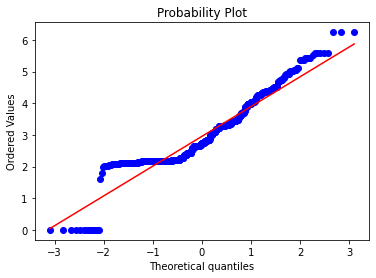

In [194]:
s.probplot(x_train1["Fare"],plot=plt)
plt.show()

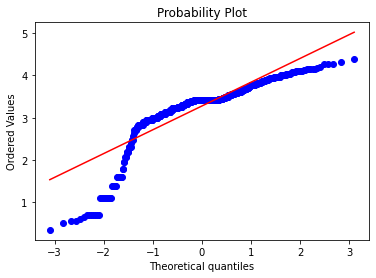

In [195]:
s.probplot(x_train1["Age"],plot=plt)
plt.show()

In [196]:
#age was better before.

In [214]:
dt=DecisionTreeClassifier()
lr=LogisticRegression()

In [217]:
m3=lr.fit(x_train1,y_train)
m4=dt.fit(x_train1,y_train)
m3.score(x_test1,y_test),m4.score(x_test1,y_test)

(0.6815642458100558, 0.6703910614525139)

In [216]:
#so we can clearly see that after appying log transformation to right skewed data,linear model performed so well but decision tree is almost same.

In [200]:
#but still age column after applying log, it has become not normal.
#so lets remove transformatio from age and only keep it in fare column

- log transformation on only fare

In [201]:
trans=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

In [202]:
x_train2=trans.fit_transform(x_train)
x_test2=trans.transform(x_test)

In [208]:
dt=DecisionTreeClassifier()
lr=LogisticRegression()

In [209]:
m5=lr.fit(x_train2,y_train)
m6=dt.fit(x_train2,y_train)
m5.score(x_test2,y_test),m6.score(x_test2,y_test)

(0.6703910614525139, 0.6983240223463687)

In [218]:
#here for logistic regression it has decreased but if we do crossvalidation there is higher chance it will decrease 

In [219]:
#so the main takeaway is observe what happens after transformation and then decide whether to apply or not and also what to apply.

In [220]:
#Final Conclusion: 
#Logistic Regression(linear model) accuracy increased after making right skewed Fare to normal by log transformation
#But decision will not be that affected by normalizing

## 2. Reciprocal Transformation

In [221]:
#i will not to details like splitting then modelling here since we have seen how to do properly above and how these transformation can affect the model

In [222]:
x, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [223]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# AveOccup means average number of household members

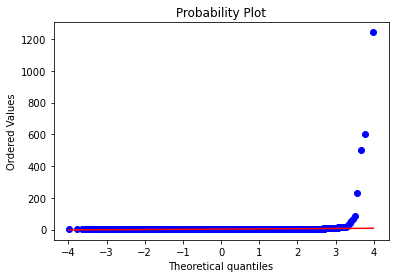

In [225]:
s.probplot(x["AveOccup"],plot=plt)
plt.show()

<AxesSubplot:>

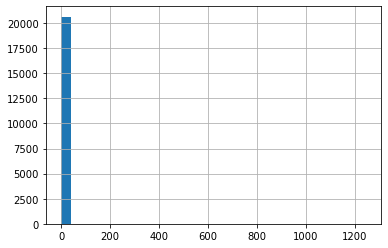

In [238]:
x["AveOccup"].hist(bins=30)

In [229]:
x["AveOccup"].value_counts()

3.000000    35
2.000000    18
2.500000    17
2.666667    16
2.333333    13
            ..
2.425926     1
2.942568     1
2.816254     1
2.837104     1
2.616981     1
Name: AveOccup, Length: 18841, dtype: int64

In [230]:
x["AveOccup"].max()

1243.3333333333333

In [231]:
#now lets apply transformation

In [232]:
trans=FunctionTransformer(func=np.reciprocal)

In [233]:
x["AveOccup_Reciprocal"]=trans.transform(x["AveOccup"])

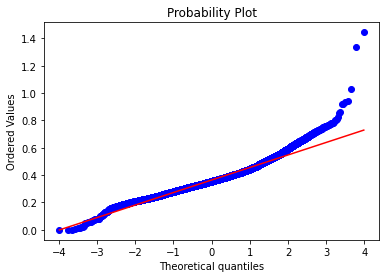

In [234]:
s.probplot(x["AveOccup_Reciprocal"],plot=plt)
plt.show()

<AxesSubplot:>

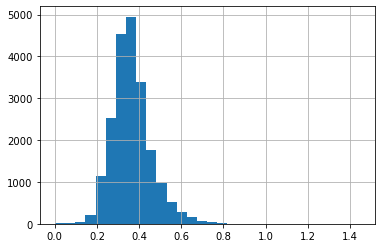

In [236]:
x["AveOccup_Reciprocal"].hist(bins=30)

## Box-Cox Transformation and Yeo-Johnson Transformation

In [265]:
#basically these two are general transformation. X --> X^lambda
#lambda is optimized in these to get normal curve
#these both can be done using power transformer in sklearn

In [266]:
df=pd.read_csv("concrete.csv")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [267]:
df.shape

(1030, 9)

In [268]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [318]:
x=df.iloc[:,:-1]
y=df["Strength"]

In [319]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [320]:
x_train.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3


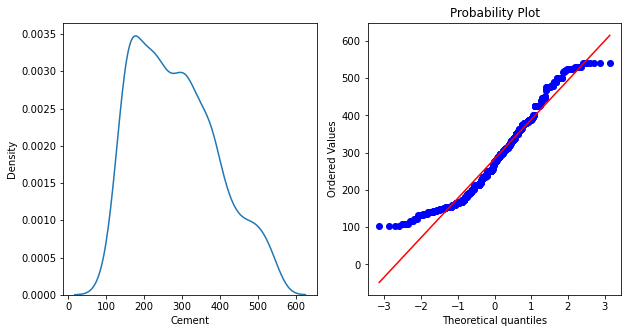

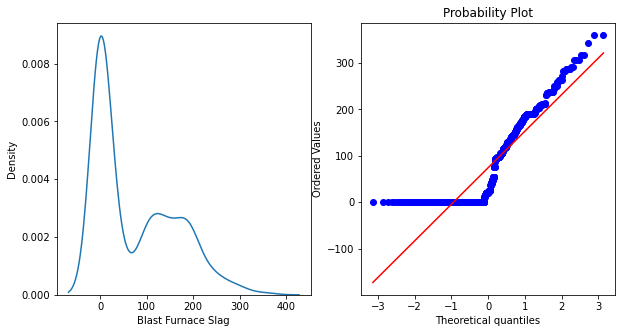

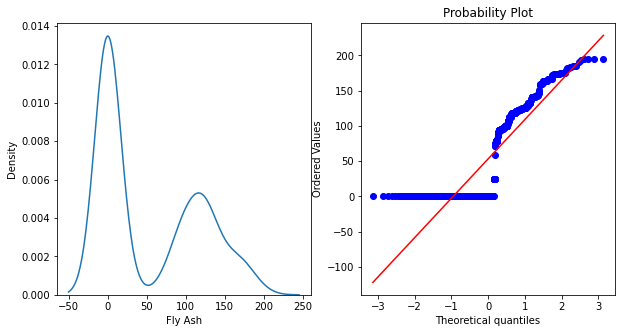

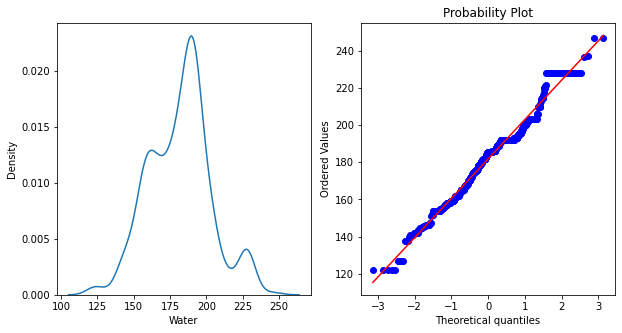

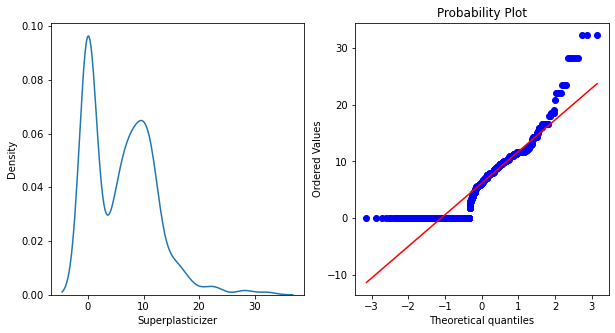

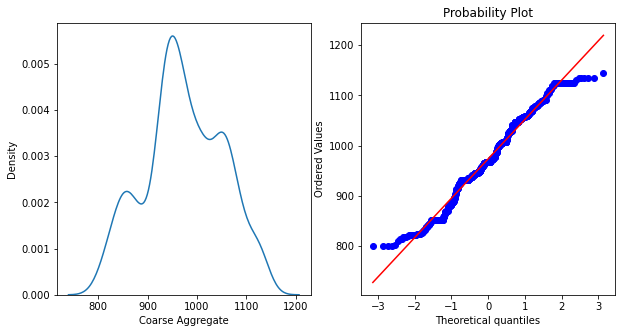

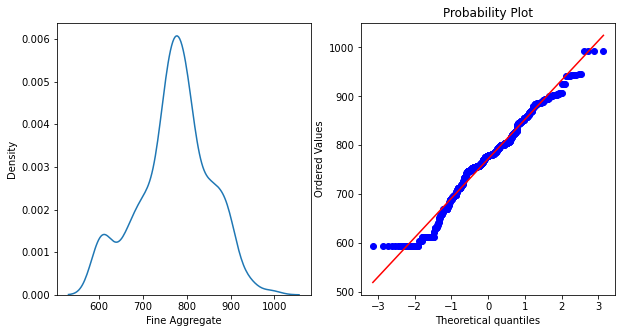

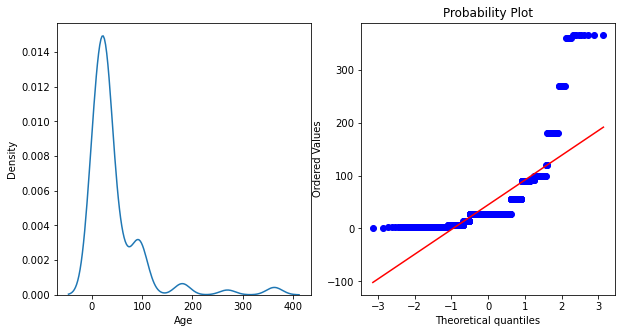

In [271]:
for i in x_train:
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    sns.kdeplot(data=x_train,x=i)
    plt.subplot(122)
    s.probplot(x_train[i],plot=plt)
    plt.show()

In [272]:
#as we can see many columns are not normal

In [273]:
#lets train the linear regression model with this data

In [274]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [321]:
lr=LinearRegression()

In [322]:
model=lr.fit(x_train,y_train)

In [323]:
model.score(x_test,y_test)

0.627553179231485

In [335]:
#lets check the score for different splits to get summary
#see how score is less. consider this score only and not the one with single split for the performance comparison
lr=LinearRegression()
cross_val_score(lr,x,y,cv=10,scoring='r2').mean()

0.27820729160873797

In [280]:
#now lets apply the transformations using power transformer

In [281]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
#it has 2 methods  yeo-johnson(default and also may be better choice) and box-cox
#(this does standardization by itself standardize=True so need for explicitly scaling)

In [282]:
trans=PowerTransformer(method='yeo-johnson')

In [ ]:
#i am doing for yeo-johnson, do same if u want for box-cox no change in remaining methods

In [294]:
x_train_trans=pd.DataFrame(trans.fit_transform(x_train),columns=x_train.columns)
x_test_trans=pd.DataFrame(trans.transform(x_test),columns=x_test.columns)

In [295]:
#these are the lambda values for the respective columns. 
#that means all values of first column cement will be raised to power 0.17434764. cement-->cement^0.17434764
trans.lambdas_

array([ 0.17434764,  0.01571519, -0.16144652,  0.77130676,  0.25393484,
        1.13005013,  1.78309974,  0.01988521])

In [290]:
#so from this we make the columns to normal distribution

In [ ]:
#lets see the distribution now after transformation and also beofre transformation for comparing

In [297]:
x_train_trans.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.279751,1.018168,1.130993,-0.301917,1.250424,-0.262504,-0.677567,0.105778
1,1.244813,0.222584,1.166671,-0.165051,0.643937,-1.912717,-0.314063,0.105778
2,0.079751,-1.056928,1.143637,-1.047299,0.796163,1.018407,0.025954,-1.664976
3,-0.145770,0.835725,1.009268,0.581232,0.585508,-1.750770,0.583249,0.105778
4,-1.131111,0.487511,1.150162,-1.105305,0.886463,1.368579,0.262619,-1.664976


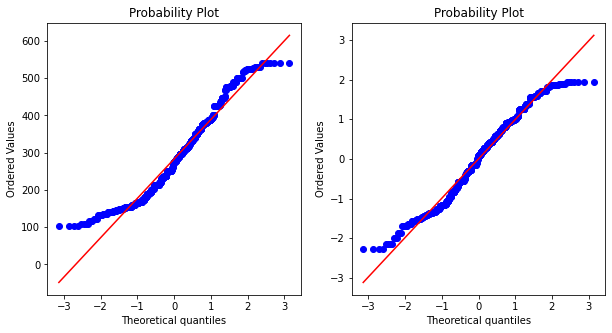

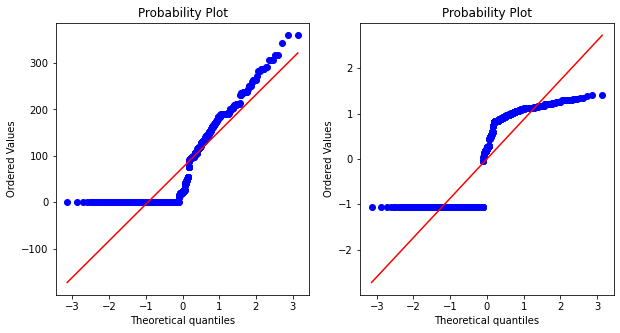

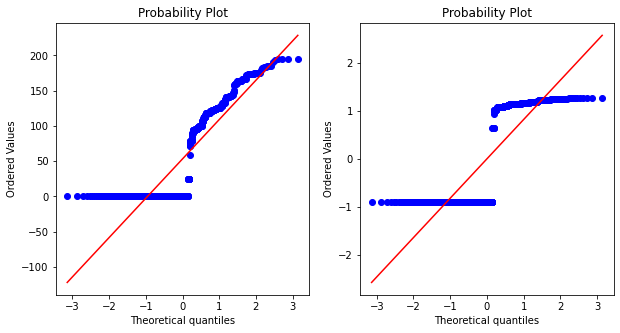

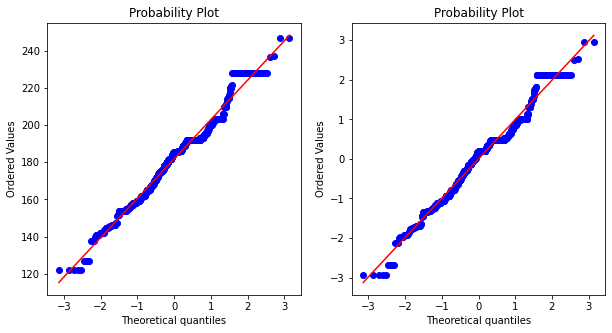

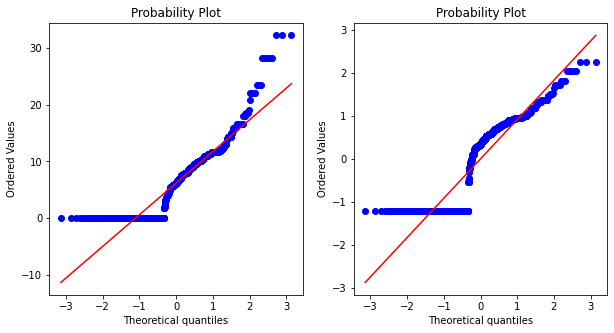

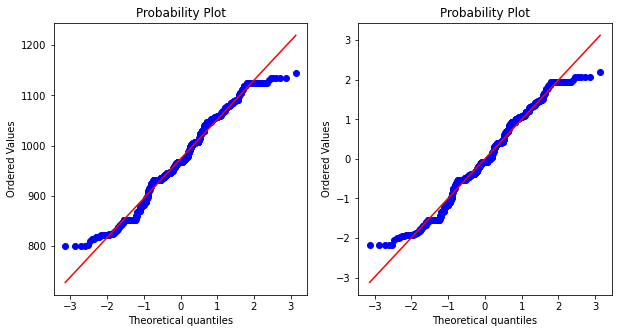

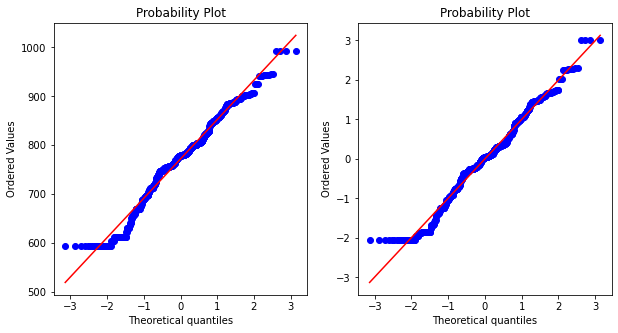

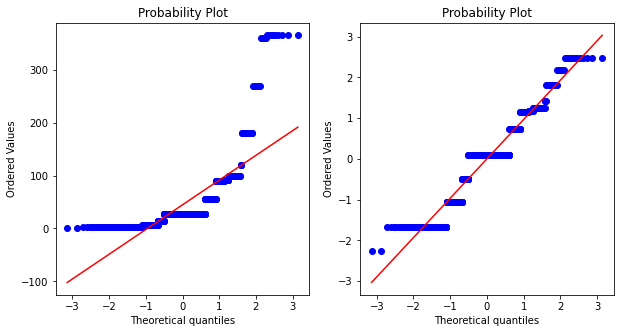

In [299]:
for i,j in zip(x_train,x_train_trans):
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.title("Before")
    s.probplot(x_train[i],plot=plt)
    plt.subplot(122)
    plt.title("After")
    s.probplot(x_train_trans[j],plot=plt)
    plt.show()

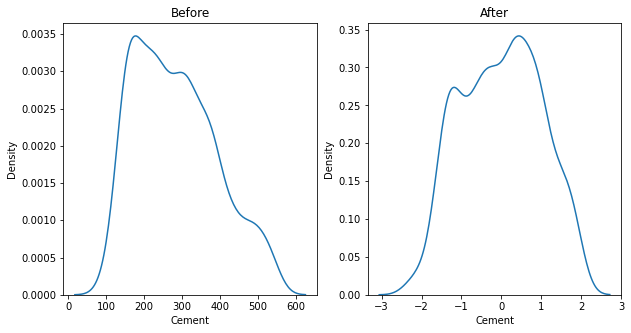

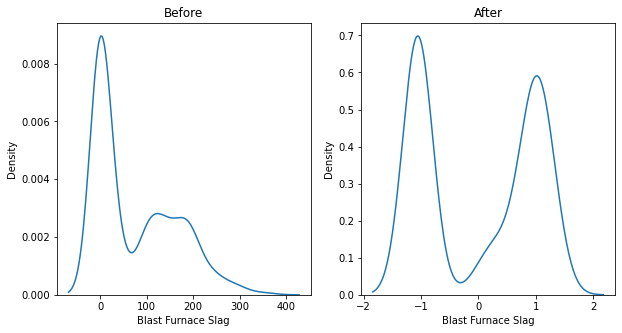

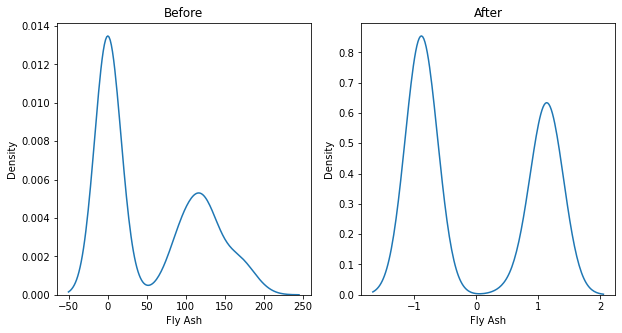

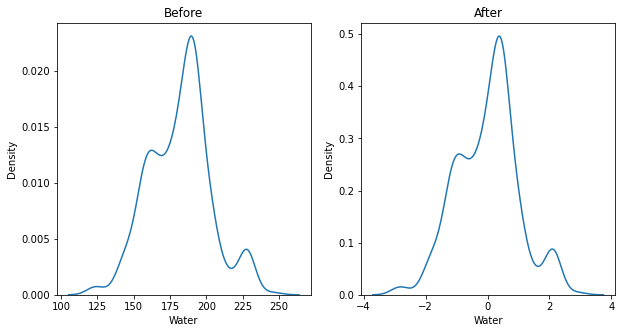

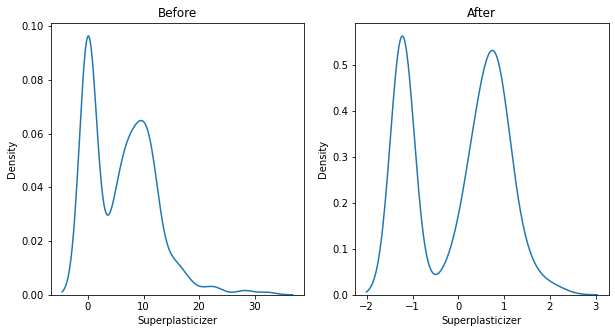

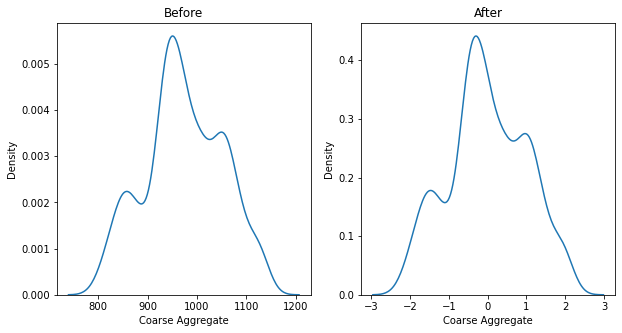

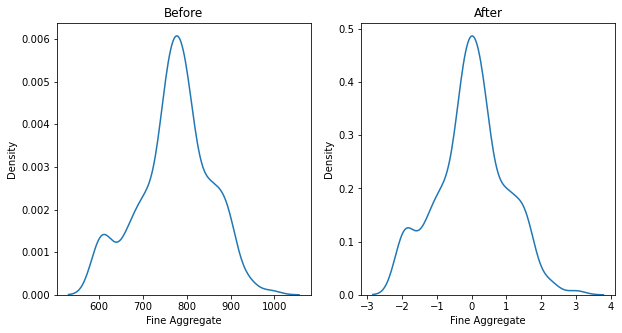

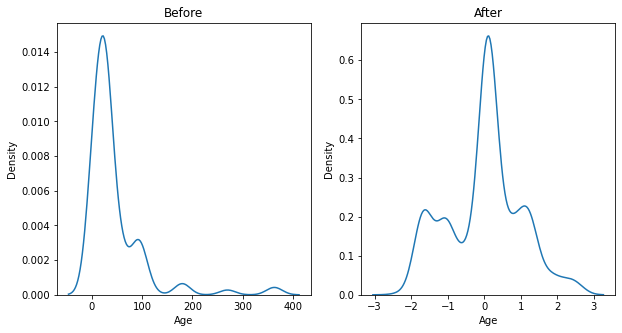

In [300]:
for i,j in zip(x_train,x_train_trans):
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.title("Before")
    sns.kdeplot(data=x_train,x=i)
    plt.subplot(122)
    plt.title("After")
    sns.kdeplot(data=x_train_trans,x=j)
    plt.show()

In [301]:
#so we have observed before and after transformation comparing two types of charts kde and qq also.
#so it seems like some are made close to normal
#lets check the results with the model performance

In [333]:
lr=LinearRegression()

In [326]:
model=lr.fit(x_train_trans,y_train)

In [327]:
model.score(x_test_trans,y_test)

0.8161906513339305

In [334]:
#lets see crossvalidated score
# we need to pass complete x for crossvalidation
lr = LinearRegression()
trans=PowerTransformer(method='yeo-johnson')
x_trans=pd.DataFrame(trans.fit_transform(x),columns=x.columns)
cross_val_score(lr,x_trans,y,cv=10,scoring='r2').mean()

0.6586548624046111

In [ ]:
# see the drastic difference between before and after transformation in this linear model
#before:0.27820729160873797
#after :0.6586548624046111